In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats

# Question 2.1

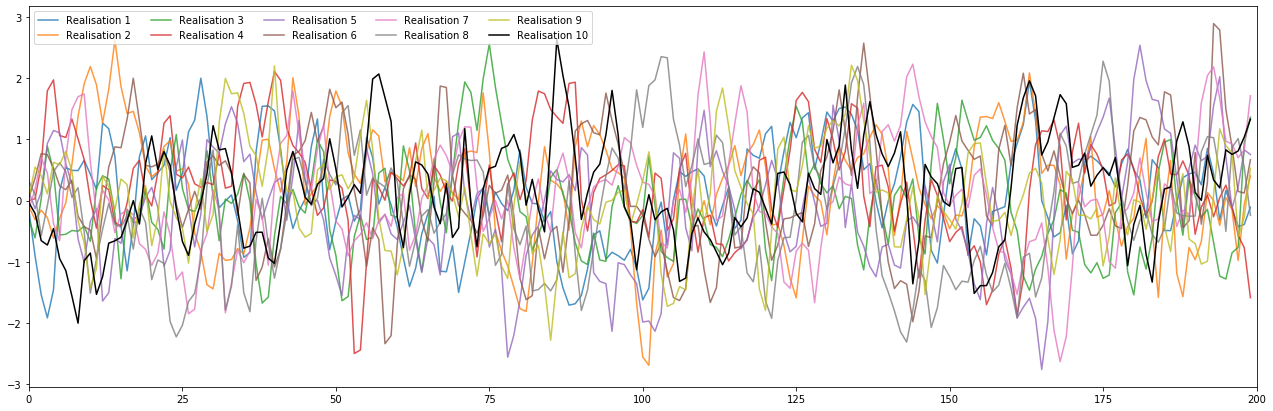

In [4]:
data_all = []
plt.figure(figsize=(22,7))
time = np.arange(200)
for i in range(9):
    data = sm.tsa.arma_generate_sample([1,-0.8], [1, 0.8, -0.5], nsample=200, sigma=0.4)
    data_all.append(data)
    plt.plot(time, data, alpha=0.8)
data = sm.tsa.arma_generate_sample([1,-0.8], [1, 0.8, -0.5], nsample=200, sigma=0.4)
data_all.append(data)
plt.xlim([0,200])
plt.plot(time, data, c='k', alpha=1)
plt.legend(['Realisation {}'.format(i+1) for i in range(10)], loc=2, ncol=5)
plt.show()

In [5]:
acfs = []
acovs = []
pacfs = []
for data in data_all:
    acf, confint_acf = sm.tsa.acf(data, alpha=0.05)
    acfs.append((acf, confint_acf))
    
    acov = sm.tsa.acovf(data)
    acovs.append((acov))
    
    pacf, confint_pacf = sm.tsa.pacf(data, alpha=0.05)
    pacfs.append((pacf, confint_pacf))

In [7]:
interval0 = 2/np.sqrt(200)

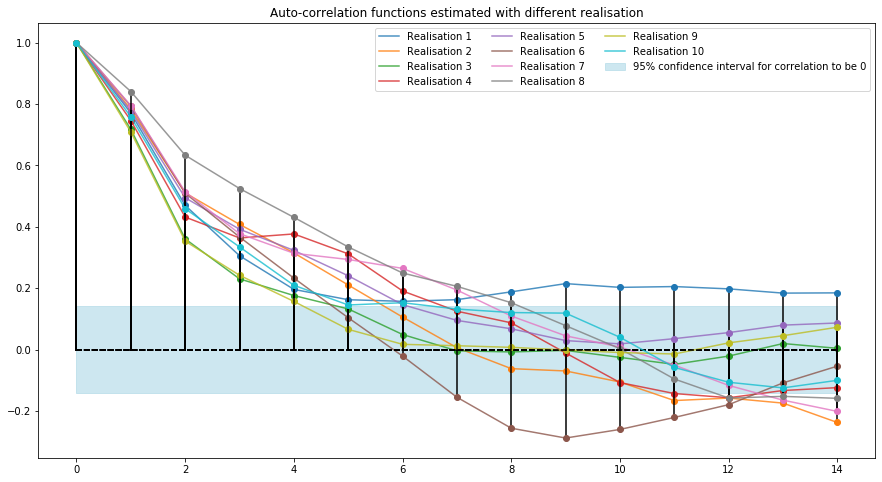

In [12]:
lag_max=15
plt.figure(figsize=(15,8))
cm = plt.get_cmap('tab10')
for i in range(10):
    plt.stem(time[:lag_max], acfs[i][0][:lag_max],'k', markerfmt='o', basefmt='k--')
    plt.plot(time[:lag_max], acfs[i][0][:lag_max], color = cm(i), alpha=0.8)
# plt.fill_between(time[:lag_max], acfs[-1][1][:,0][:lag_max] - acfs[-1][0][:lag_max], acfs[-1][1][:,1][:lag_max] - acfs[-1][0][:lag_max], color='lightblue', alpha=0.5)
plt.fill_between(time[:lag_max],interval0, -interval0, color='lightblue', alpha=0.6)
plt.legend(['Realisation {}'.format(i+1) for i in range(10)]+['95% confidence interval for correlation to be 0'], loc=1, ncol=3 )
plt.title('Auto-correlation functions estimated with different realisation')
plt.show()

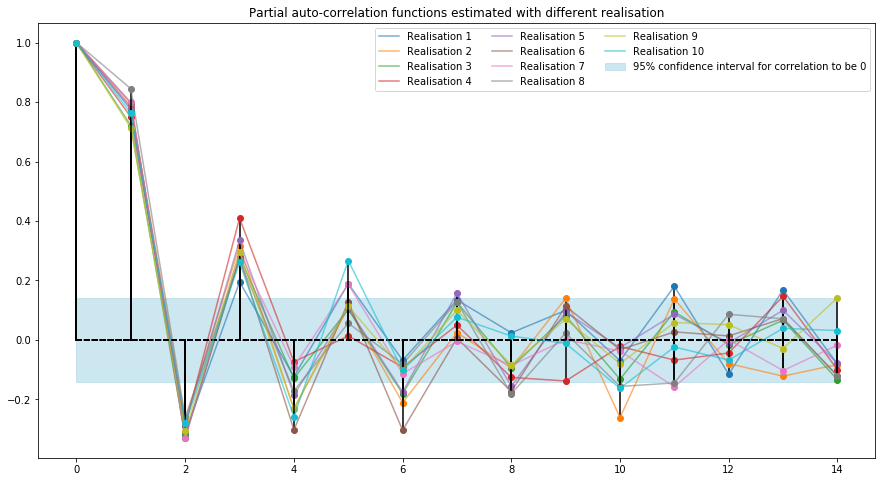

In [14]:
lag_max=15
plt.figure(figsize=(15,8))
cm = plt.get_cmap('tab10')
for i in range(10):
    
    plt.stem(time[:lag_max], pacfs[i][0][:lag_max],'k', markerfmt='o', basefmt='k--')
    plt.plot(time[:lag_max], pacfs[i][0][:lag_max], color = cm(i), alpha=0.6)
plt.fill_between(time[:lag_max],interval0, -interval0, color='lightblue', alpha=0.6)
plt.legend(['Realisation {}'.format(i+1) for i in range(10)]+['95% confidence interval for correlation to be 0'], loc=1, ncol=3 )
plt.title('Partial auto-correlation functions estimated with different realisation')
plt.show()

Variance of the realizations (to be checked)

In [16]:
acovs_array = np.array(acovs)


In [17]:
variances = acovs_array[:,0]
variances

array([0.66323056, 0.81781391, 0.61690616, 0.68555171, 0.9362374 ,
       0.93271076, 0.82275365, 1.06407282, 0.66249059, 0.70305696])

In [18]:
analytical_acf = [1,0.67/0.84, 0.456/0.84]
for i in range(lag_max-3):
    analytical_acf.append(0.8*analytical_acf[-1])

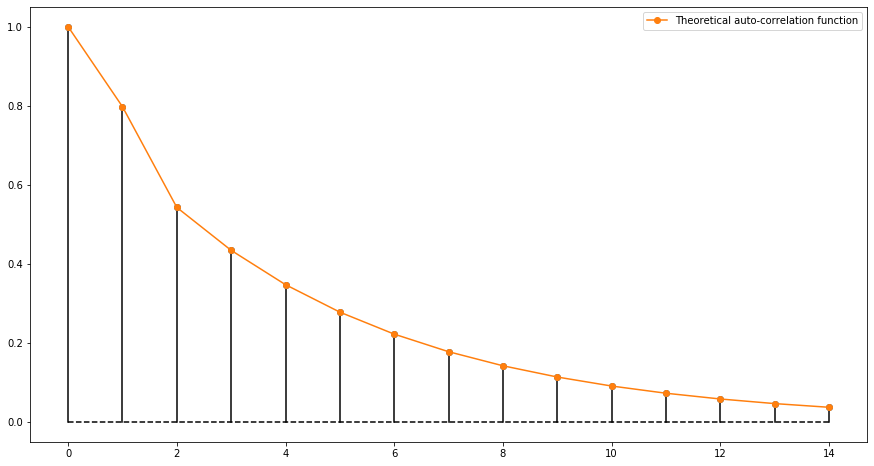

In [19]:
plt.figure(figsize=(15,8))
plt.stem(time[:lag_max], analytical_acf,'k', markerfmt='o', basefmt='k--')
plt.plot(time[:lag_max], analytical_acf, '-o')
plt.legend(['Theoretical auto-correlation function'])


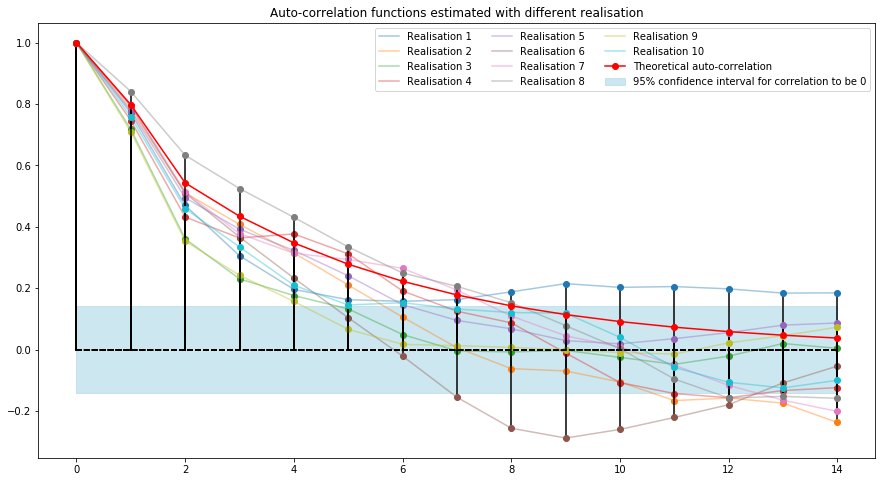

In [20]:
plt.figure(figsize=(15,8))
for i in range(10):
    plt.stem(time[:lag_max], acfs[i][0][:lag_max],'k', markerfmt='o', basefmt='k--')
    plt.plot(time[:lag_max], acfs[i][0][:lag_max], color = cm(i), alpha=0.4)
plt.fill_between(time[:lag_max],interval0, -interval0, color='lightblue', alpha=0.6)
plt.plot(time[:lag_max], analytical_acf, color='r', marker='o')
plt.legend(['Realisation {}'.format(i+1) for i in range(10)]+['Theoretical auto-correlation', '95% confidence interval for correlation to be 0'], loc=1, ncol=3 )
plt.title('Auto-correlation functions estimated with different realisation')
plt.show()

Really close to estimated acf

Add variance interval to distinguish from noise on all plots

# Question 2.2

In [3]:
data_sales = pd.read_csv('A2_sales.txt', ' ')
mu = 2070 
sigma = np.sqrt(36963)

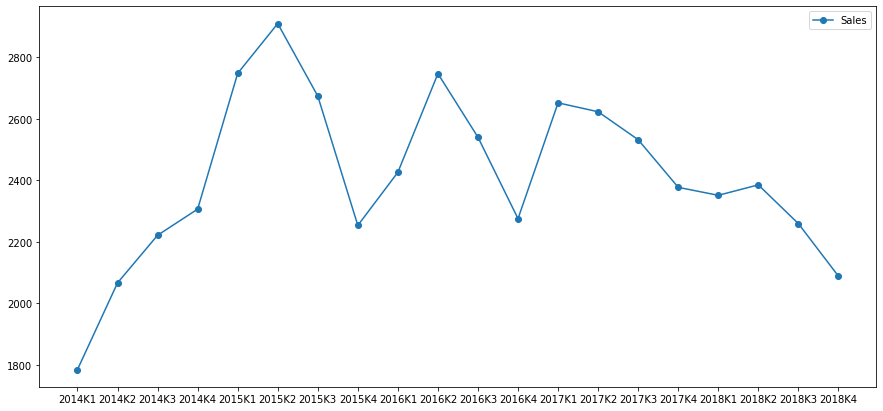

In [4]:
plt.figure(figsize=(15,7))
plt.plot(data_sales['Quarter'], data_sales['Sales'], '-o')
plt.legend(['Sales'])
plt.show()

In [5]:
model = np.array([0.172, -0.8944, 0.86,0,-0.2,1.04])
theta_err = -0.42
data = data_sales['Sales'].values - mu

In [6]:
a = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [7]:
a[11:18]

[11, 12, 13, 14, 15, 16, 17]

In [8]:
def get_err_estimate(t):
    if t<6:
        return 0, data[t] + mu
    Y = np.sum(model*data[t-6:t]) + theta_err * get_err_estimate(t-4)[0]
    try:
        err = (data[t]-Y)
    except:
        err = None
    return err, Y + mu

def get_err_estimate_no_prop(t):
    if t<6:
        return 0, data[t] + mu
    Y = np.sum(model*data[t-6:t])
    try:
        err = (data[t]-Y)
    except:
        err = None
    return err, Y + mu


In [9]:
estimates = list(map(lambda x: get_err_estimate(x)[1], [a for a in range(0,20)]))
estimates_no_prop = list(map(lambda x: get_err_estimate_no_prop(x)[1], [a for a in range(0,20)]))

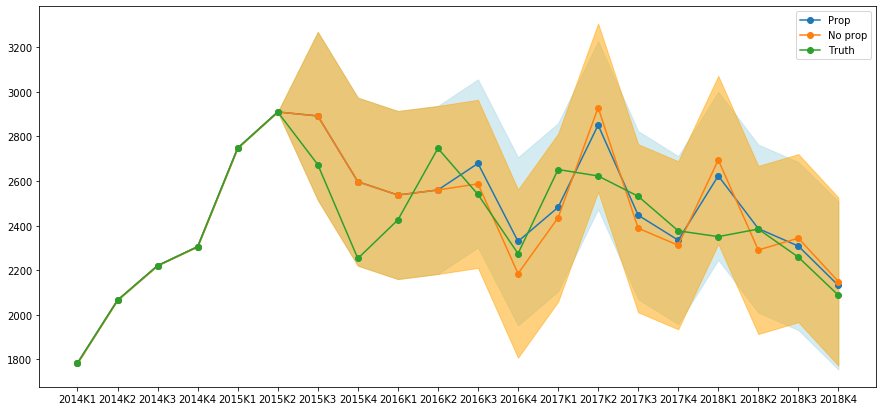

In [10]:
interval_val = scipy.stats.norm.ppf(0.975)*sigma
interval = np.array([0 for i in range(6)] + [interval_val for i in range(14)])
plt.figure(figsize=(15,7))
plt.plot(data_sales['Quarter'], estimates, '-o')
plt.fill_between(data_sales['Quarter'], estimates + interval, estimates - interval, color='lightblue', alpha=0.5)
plt.plot(data_sales['Quarter'], estimates_no_prop, '-o')
plt.fill_between(data_sales['Quarter'], estimates_no_prop + interval, estimates_no_prop - interval, color='orange', alpha=0.5)
plt.plot(data_sales['Quarter'], data_sales['Sales'], '-o')
plt.legend(['Prop', 'No prop', 'Truth'])

In [11]:
Y21_no_prop = get_err_estimate_no_prop(20)[1] + theta_err * get_err_estimate_no_prop(17)[0]
Y21_no_prop

2058.0416640000003

In [12]:
Y21 = get_err_estimate_no_prop(20)[1] + theta_err * get_err_estimate(17)[0]
Y21

2098.2830367744

In [13]:
interval_1_pred = scipy.stats.norm.ppf(0.975)*sigma*np.sqrt(np.sum([1]))
interval_1_pred

376.8180494473652

In [14]:
data = np.append(data, Y21-mu)

In [15]:
sigma

192.25763964014538

In [16]:
sigma* np.sqrt(np.sum([1, 1.04**2]))

277.38453597848604

In [58]:
Y22_no_prop = get_err_estimate_no_prop(21)[1] + theta_err * get_err_estimate_no_prop(18)[0]
Y22_no_prop

2203.984694245376

In [59]:
Y22 = get_err_estimate_no_prop(21)[1] + theta_err * get_err_estimate(18)[0]
Y22

2189.017246650752

In [60]:
interval_2_pred = scipy.stats.norm.ppf(0.95)*sigma*np.sqrt(np.sum([1, 1.04**2]))
interval_2_pred

456.2569600644639

In [68]:
interval = np.array([0 for i in range(6)] + [interval_1_pred for i in range(14)] + [interval_1_pred, interval_2_pred])
pred_no_prop = np.array(estimates_no_prop + [Y21_no_prop, Y22_no_prop])
pred = np.array(estimates + [Y21, Y22])

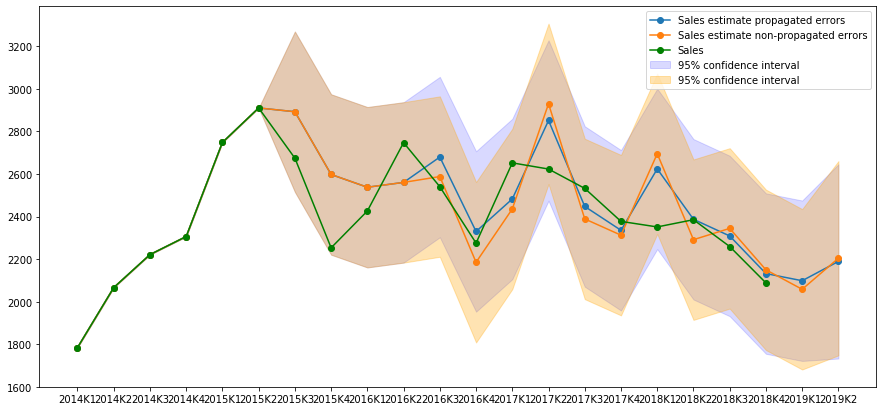

In [69]:
plt.figure(figsize=(15,7))
plt.plot(data_sales['Quarter'].values.tolist()+['2019K1', '2019K2'], pred, '-o')
plt.fill_between(data_sales['Quarter'].values.tolist()+['2019K1', '2019K2'], pred+interval, pred-interval,color='blue', alpha=0.15)
plt.plot(data_sales['Quarter'].values.tolist()+['2019K1', '2019K2'], pred_no_prop, '-o')
plt.fill_between(data_sales['Quarter'].values.tolist()+['2019K1', '2019K2'], pred_no_prop+interval, pred_no_prop-interval,color='orange', alpha=0.3)


plt.plot(data_sales['Quarter'], data_sales['Sales'], '-o', c='green')
# plt.legend(['Sales estimate values', 'True sales', '95% confidence interval'])
plt.legend(['Sales estimate propagated errors', 'Sales estimate non-propagated errors','Sales', '95% confidence interval', '95% confidence interval'])
plt.show()

# Question 2.3

/home/pierre/miniconda3/envs/TSA/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pierre/miniconda3/envs/TSA/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pierre/miniconda3/envs/TSA/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pierre/miniconda3/envs/TSA/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pierre/miniconda3/envs/TSA/lib/python3.7/site-packages/statsmodels/base/model.py:512: Converge

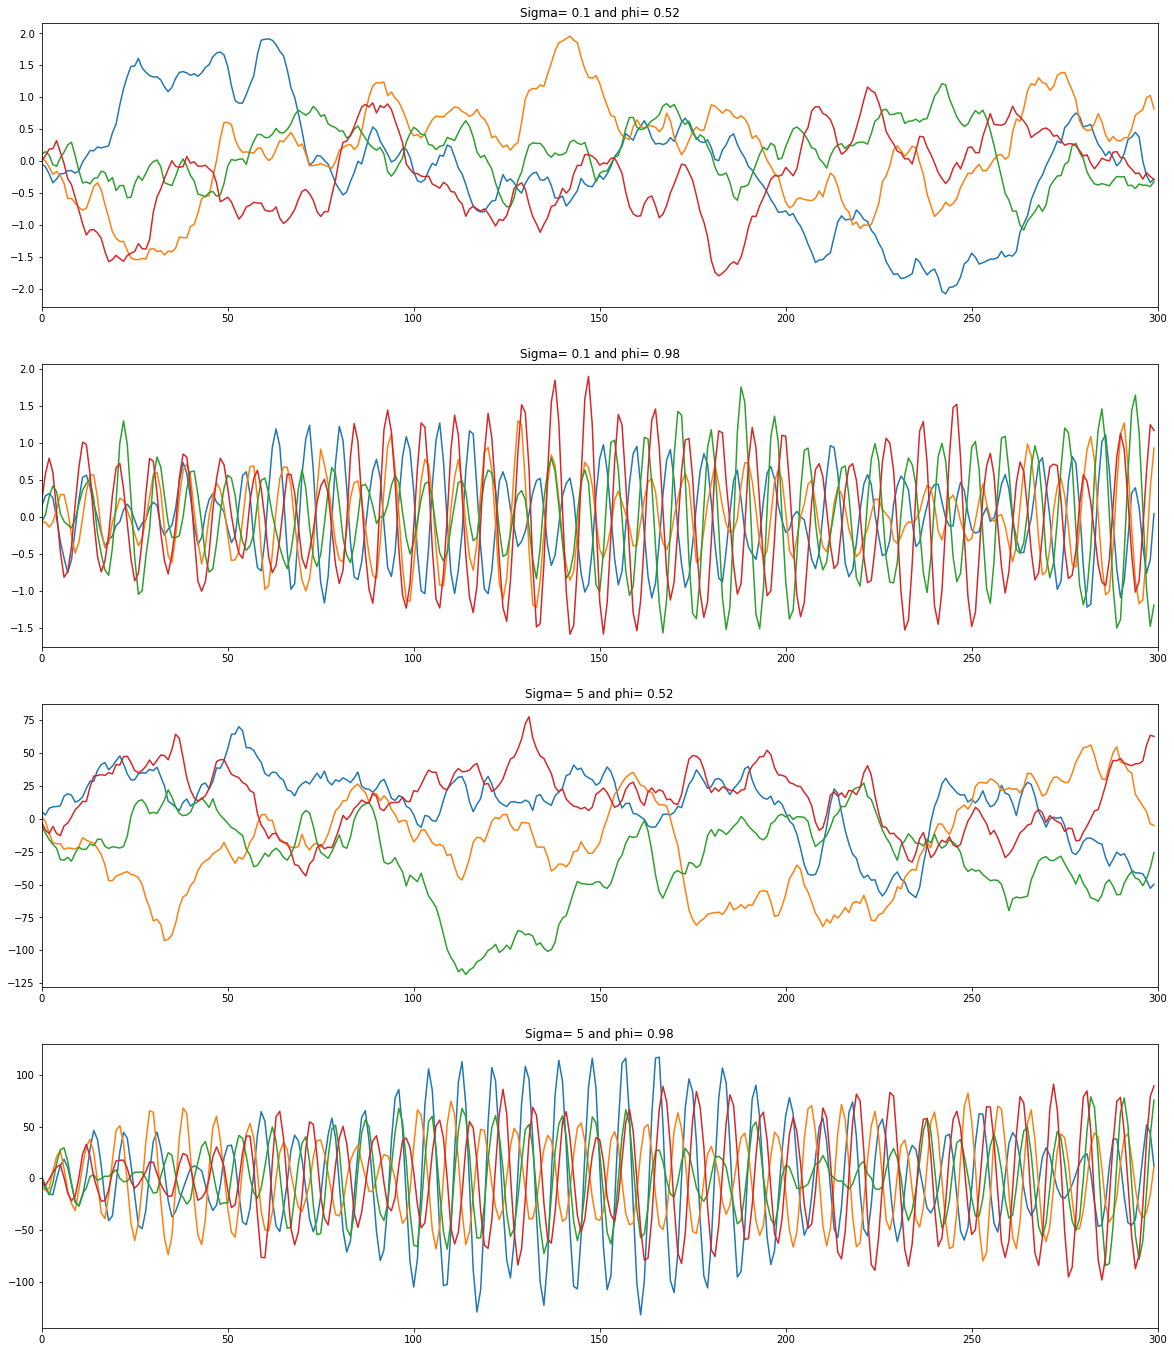

In [20]:
data_all_params = []
models_all = []
phis = [0.52, 0.98]
sigmas = [0.1, 5]
plt.figure(figsize=(20,24))
for i_phi, phi in enumerate(phis):
    for i_sigma, sigma in enumerate(sigmas):
        realizations = []
        estimated_model = []
        for i in range(100):
            data = sm.tsa.arma_generate_sample([1,-1.5,phi], [1], nsample=300, sigma=sigma)
            time = np.arange(300)
            realizations.append(data)
            plt.subplot(4,1,(i_phi+1)+2*(i_sigma))
            if i >95:
                plt.plot(time, data)
            plt.title('Sigma= {} and phi= {}'.format(sigma, phi))
            try:
                estimated_model.append(sm.tsa.ARMA(data, (2,0)).fit(disp=False))
            except:
                pass
        data_all_params.append(realizations)
        plt.xlim([0, 300])
        models_all.append({'estimation':estimated_model, 'params':(phi, sigma)})

In [21]:
model_array = [{'estimated_params':np.array([model.params for model in models_all[i]['estimation']]),
                'original_params': models_all[i]['params']} for i in range(4)]

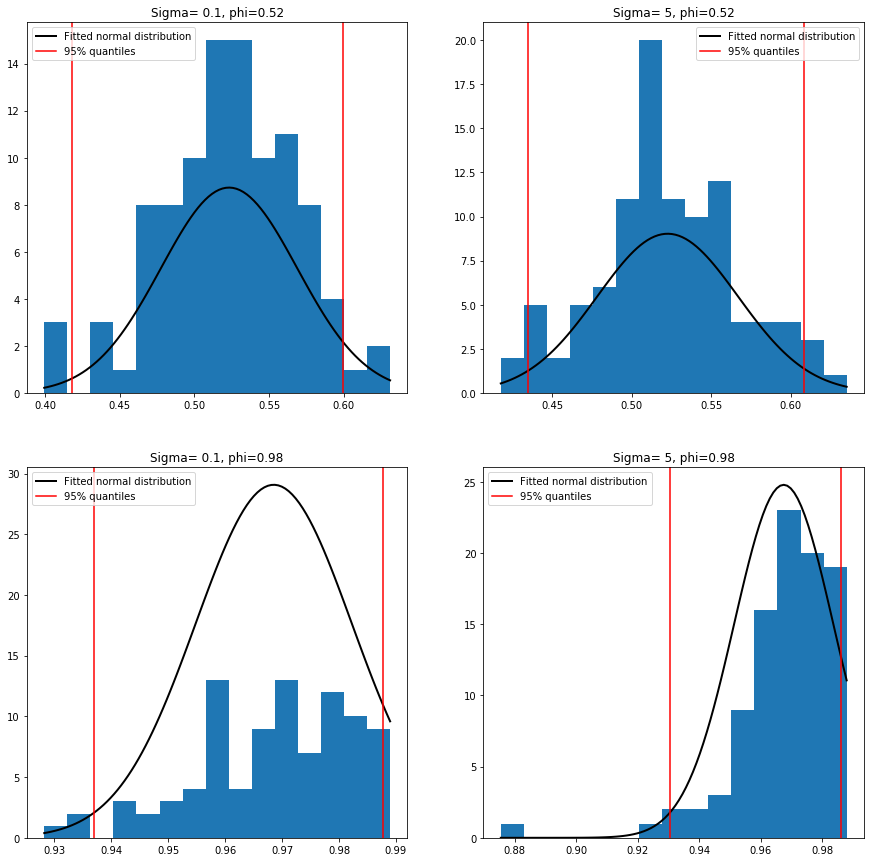

In [22]:
params_std = []
plt.figure(figsize=(15,15))
for i, models in enumerate(model_array):
#     phi_estimate = models['estimated_params'][:,2]
    phi_estimate = np.abs(models['estimated_params'][:,2])
    phi,sigma = models['original_params']
    quantiles = np.quantile(phi_estimate, [0.025,0.975])
    params_std.append((quantiles[1]-quantiles[0])/4)
    
    mu, std = norm.fit(phi_estimate)
    x = np.linspace(np.min(phi_estimate), np.max(phi_estimate), 100)
    p = norm.pdf(x, mu, std)
    
    
    plt.subplot(2,2,i+1)
    plt.plot(x, p, 'k', linewidth=2)
    plt.hist(phi_estimate, bins=15)
    plt.axvline(x=quantiles[0], c='r')
    plt.axvline(x=quantiles[1], c='r')
    plt.title('Sigma= {}, phi={}'.format(sigma, phi))
    
    plt.legend(['Fitted normal distribution','95% quantiles'])

In [23]:
print(params_std)

[0.04534624966704767, 0.043318983660910776, 0.012687172678445519, 0.013915925036226795]


95% quantile: for normal distribution: 4 sigma

Greater phi seems to lead to smaller variance of the parameter estimates.

Variance of errors seems to reduce slightly the variance of the parameter estimates

Interpretation? 

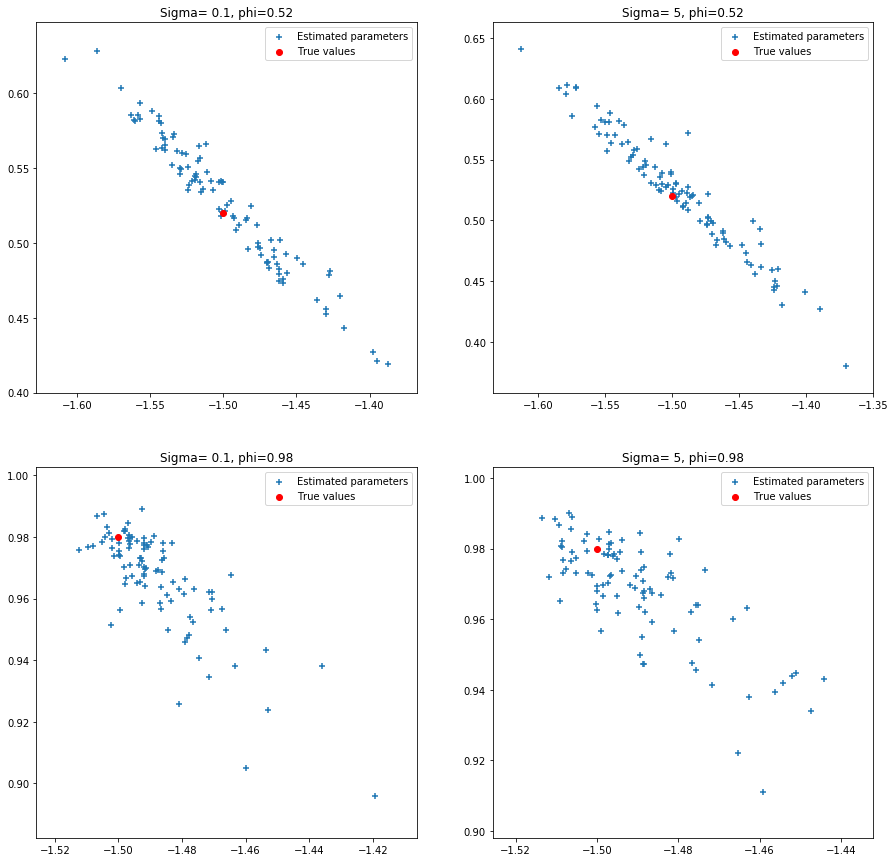

In [15]:
plt.figure(figsize=(15,15))
for i, models in enumerate(model_array):
    phi2 = np.abs(models['estimated_params'][:,2])
    phi1 = -models['estimated_params'][:,1]
    phi,sigma = models['original_params']
    
    
    plt.subplot(2,2,i+1)
    plt.scatter(phi1, phi2, marker='+')
    plt.scatter(-1.5,phi, color='r', marker='o')
    plt.title('Sigma= {}, phi={}'.format(sigma, phi))
    plt.legend(['Estimated parameters', 'True values'])

In [37]:
def sig_inv(x):
    return -np.log((1-x))
#     return -1/(x-1)
#     return -np.log((1-x)/x)

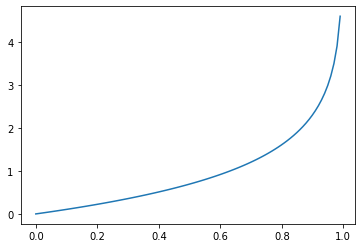

In [38]:
plt.plot(np.linspace(0,1,100), sig_inv(np.linspace(0,1,100)))

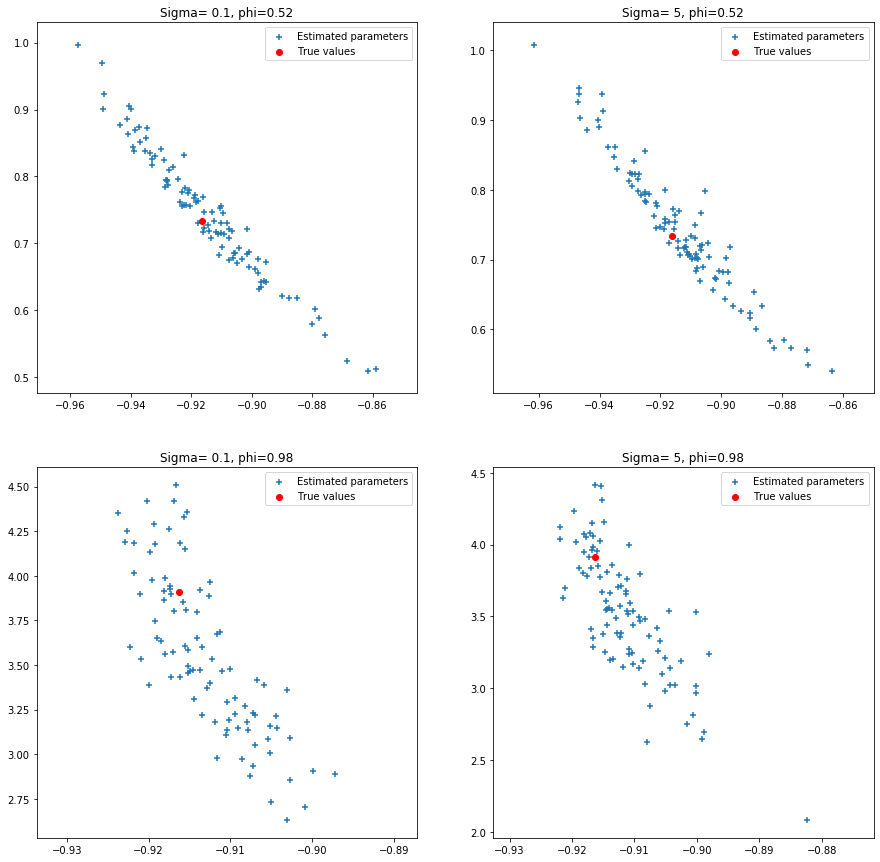

In [39]:
plt.figure(figsize=(15,15))
for i, models in enumerate(model_array):
    phi2 = np.abs(models['estimated_params'][:,2])
    phi1 = -models['estimated_params'][:,1]
    phi,sigma = models['original_params']
    
    
    plt.subplot(2,2,i+1)
    plt.scatter(sig_inv(phi1), sig_inv(phi2), marker='+')
    plt.scatter(sig_inv(-1.5),sig_inv(phi), color='r', marker='o')
    plt.title('Sigma= {}, phi={}'.format(sigma, phi))
    plt.legend(['Estimated parameters', 'True values'])

In [29]:
phi2

array([0.97240396, 0.9784832 , 0.95712708, 0.96599235, 0.95122312,
       0.98085223, 0.97148382, 0.97083704, 0.97286744, 0.9590785 ,
       0.98232616, 0.97845258, 0.96423546, 0.98004954, 0.98657553,
       0.98202146, 0.95106175, 0.97764261, 0.93604923, 0.98553031,
       0.98071737, 0.95474338, 0.98439215, 0.95789405, 0.9711743 ,
       0.96794855, 0.94359318, 0.93995815, 0.98100386, 0.97465917,
       0.96914462, 0.97084411, 0.97413151, 0.97545123, 0.96964553,
       0.95881717, 0.97562841, 0.95126834, 0.95687027, 0.98141471,
       0.97081146, 0.9713887 , 0.98215903, 0.9694104 , 0.95661176,
       0.98789131, 0.96113463, 0.96082907, 0.87551847, 0.96783462,
       0.96732958, 0.93260436, 0.97777077, 0.95151145, 0.96267374,
       0.96698981, 0.97116525, 0.96204387, 0.97708056, 0.98159599,
       0.9612976 , 0.97887305, 0.97087325, 0.9719513 , 0.97875196,
       0.97527746, 0.92745814, 0.95955872, 0.96528439, 0.98257192,
       0.96605062, 0.97729776, 0.96169908, 0.96877401, 0.97440